# Store Sales and Profit Analysis: Dataset

Let’s start this task by importing the necessary Python libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Downloads/Sample - Superstore.csv", encoding='latin-1')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Let’s start by looking at the descriptive statistics of the dataset:

In [5]:
print(df.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


The dataset has an order date column. We can use this column to create new columns like order month, order year, and order day, which will be very valuable for sales and profit analysis according to time periods. So let’s add these columns:

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date']) 

In [7]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [8]:
df['Order Month'] = df['Order Date'].dt.month 
df['Order Year'] = df['Order Date'].dt.year
df['Order Day of Week'] = df['Order Date'].dt.dayofweek

Now let’s have a look at the monthly sales:

In [9]:
Sales_by_month = df.groupby(["Order Month"])["Sales"].sum().reset_index()

In [10]:
Sales_by_month

,Order Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


Text(0.5, 1.0, 'Monthly Sales')

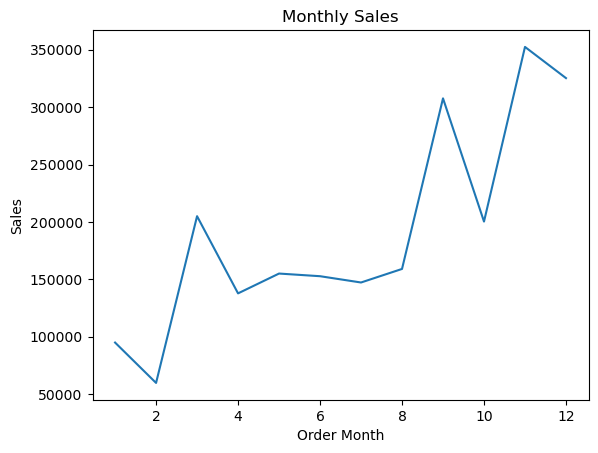

In [11]:
sns.lineplot(Sales_by_month, x= "Order Month", y= "Sales").set_title("Monthly Sales")

Now let’s have a look at the sales by category:

In [12]:
Sales_by_category = df.groupby(["Category"])['Sales'].sum().reset_index()

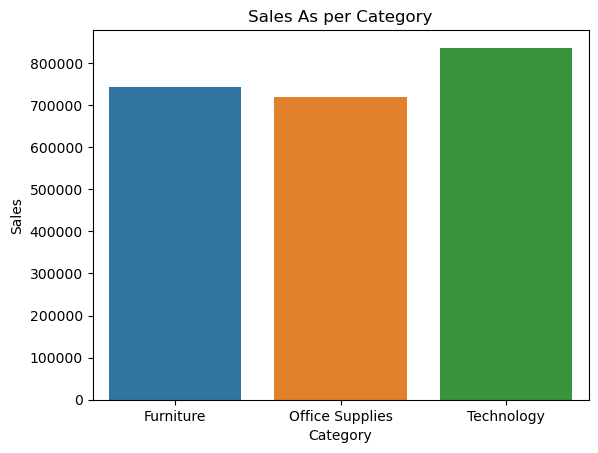

In [13]:
ax = sns.barplot(Sales_by_category, x="Category", y="Sales").set_title("Sales As per Category")


Now let’s have a look at the sales by sub-category:

In [14]:
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().reset_index()

<Axes: xlabel='Sub-Category', ylabel='Sales'>

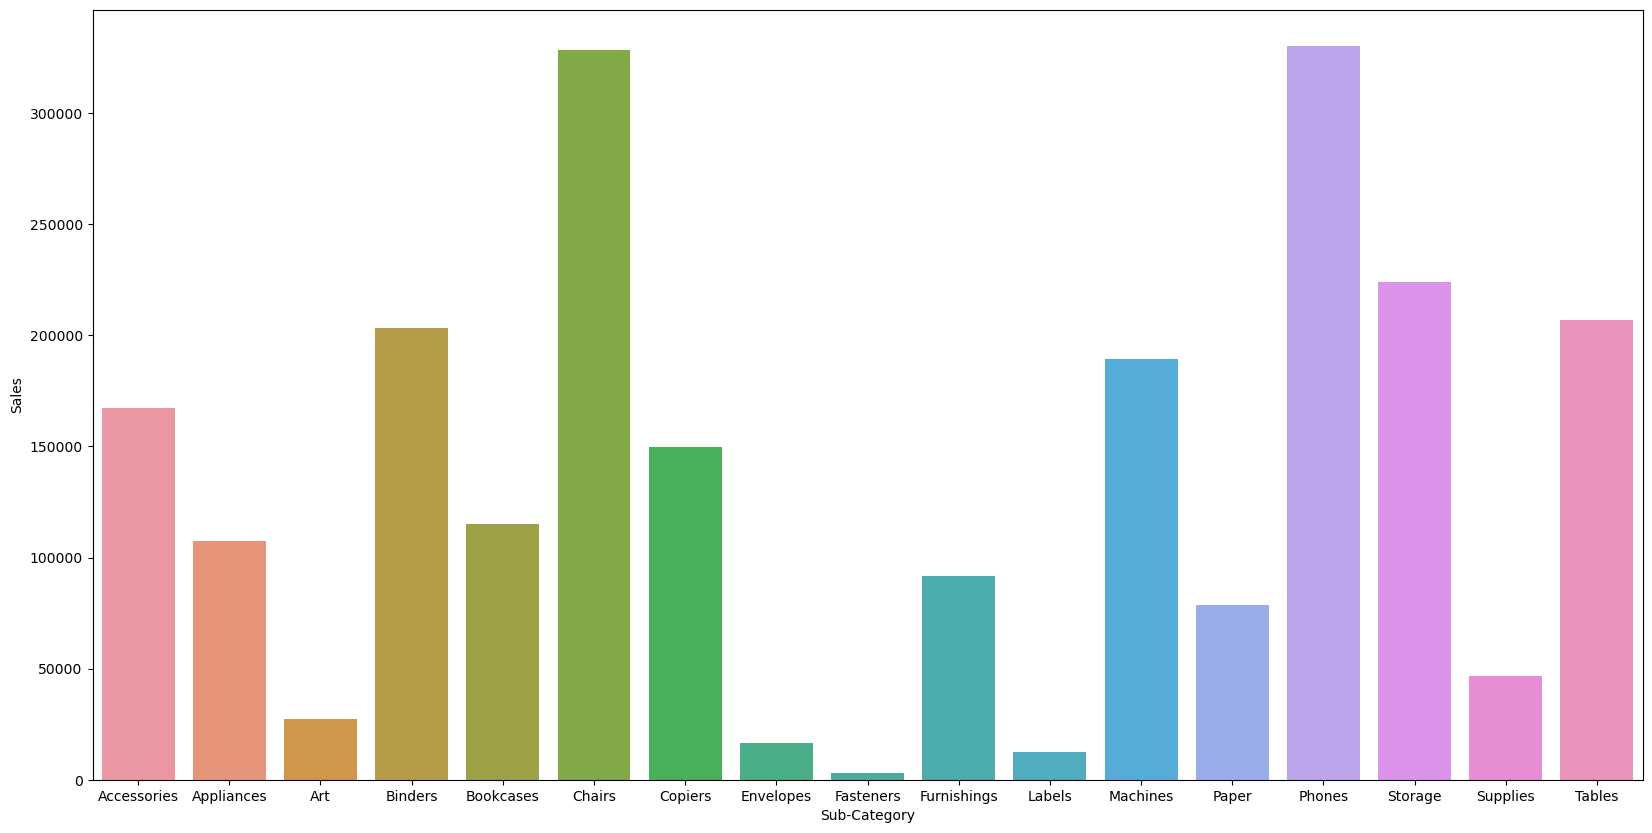

In [15]:
plt.figure(figsize=(20,10))
sns.barplot(sales_by_subcategory, x="Sub-Category", y="Sales")

Now let’s have a look at the monthly profits:

In [16]:
profit_by_month = df.groupby('Order Month')['Profit'].sum().reset_index()

Text(0.5, 1.0, 'Profit as per Month')

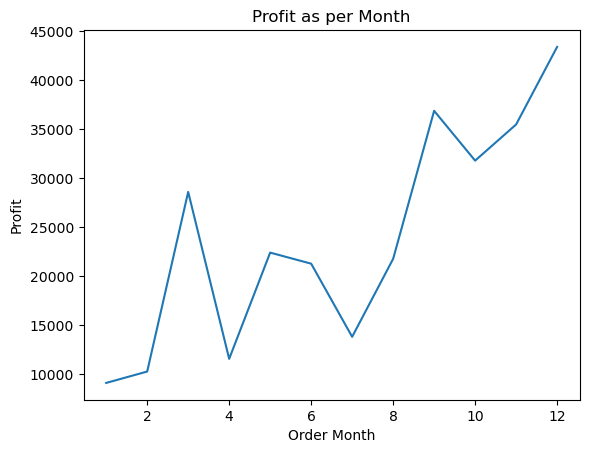

In [17]:
sns.lineplot(profit_by_month, x="Order Month", y="Profit").set_title("Profit as per Month")

Now let’s have a look at the profit by category:

In [18]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

Text(0.5, 1.0, 'Profit As Per Category')

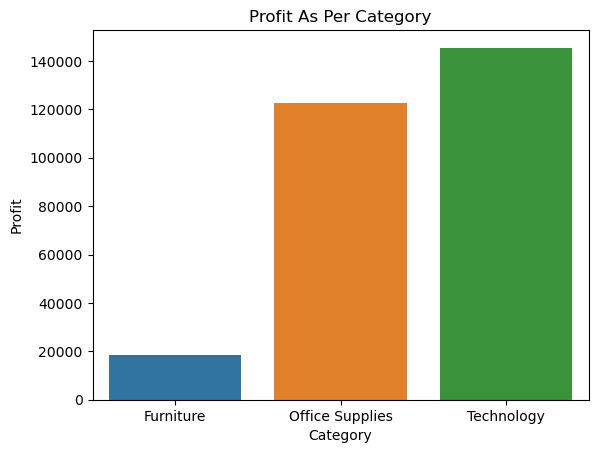

In [19]:
sns.barplot(profit_by_category, x="Category", y="Profit").set_title("Profit As Per Category")

In [20]:
Now let’s have a look at the profit by sub-category:

SyntaxError: invalid character '’' (U+2019) (393520959.py, line 1)

In [ ]:
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index()

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(profit_by_subcategory, x="Sub-Category", y="Profit").set_title("Profit as per Sub-category")

Now let’s have a look at the sales and profit analysis by customer segments:

In [ ]:
Profit_segment = df.groupby(["Segment"]).agg({"Sales" : "sum", "Profit": "sum"}).reset_index()

In [ ]:
Profit_segment

In [ ]:
sns.barplot(Profit_segment, x="Segment", y="Profit" ).set_title("Profit as per segment")

In [ ]:
sns.barplot(Profit_segment, x="Segment", y="Sales").set_title("Total sales as per segment")

So the store has higher profits from the product sales for consumers, but the profit from corporate product sales is better in the sales-to-profit ratio. Let’s have a look at it to validate our findings:

In [ ]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

# Summary

Store sales and profit analysis help businesses identify areas for improvement and make data-driven decisions to optimize their operations, pricing, marketing, and inventory management strategies to drive revenue and growth. I hope you liked this article on the task of analyzing the sales and profit of a store using Python. Feel free to ask valuable questions in the comments section below.